<p style="text-align: center;">
<font size="6"> 
The Lorenz Equations and Deterministic Chaos 
</font>
<br/><br/>
Dannie Wright
</p>

## Introduction

In this project I will apply numerical methods to solve the Lorenz equations, which is a set of differential equations meant to model a simplified weather system [3]. Many solutions to the Lorenz equations exhibit deterministic chaos; to help introduce the idea of deterministic chaos the project will begin by examining the solution to a damped driven nonlinear pendulum. Then I will look at the solution to the Lorenz equations.

The damped driven nonlinear pendulum I looked at had a frictional force component proportional to the velocity and a sinusoidal driving force. These are arbitrary choices for the frictional force and driving force, and were chosen because these choices result in interesting behaviour. The equation of motion for the pendulum is given by

\begin{equation*}
\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin(\theta) - \alpha_f \frac{d\theta}{dt} + F_d \sin (\Omega_d t),
\end{equation*}

where $g$ is the force of gravity, $l$ is the length of the pendulum arm, $\theta$ is the angle of displacement from the vertical, $\alpha_f$ is a coefficient for the damping force, $F_d$ is a coefficient for the driving force, and $t$ is time. This is a second order differential equation that we can use to solve for a damped driven nonlinear pendulum’s angular displacement as it evolves through time. *Figure 1* shows the angular displacement of three pendulums allowed to evolve for 50 seconds. For the case of the driving coefficient being 0 N/kg (shown in black) the pendulum comes to rest within a few oscillations, owing to the frictional force removing energy from the system. When $F_d$ is 0.5 N/kg (shown in yellow) the pendulum regularly oscillates with the same magnitude. The final case shown in *figure 1* is for $F_d$ = 1.2 N/kg (shown in blue). In this case the driving force is large enough to cause the pendulum to swing in a full circle. The seemingly discontinuous points on the graph are the result of adding or subtracting $2\pi$ to the angle of the pendulum in order to keep the range between $-\pi$ and $\pi$. 



In [1]:
import numpy as np
import pylab as plt
from RungeKutta import vectorRungeKutta as rk
from mpl_toolkits.mplot3d import Axes3D
import doctest
%matplotlib inline

In [4]:
def nonlinearPendulum (r, t, g, l, alpha_f, F_d, omega_d):
    """
    Description:calculates the values of the differential equations 
                that describe the damped driven nonlinear pendulum
    
    Parameters: r - touple (omega, theta) both are floats
                t - float, time of evaluations
                g - float, gravitational acceleration
                l - float, length of pendulum
                alpha_f - float, frictional factor
                F_d - float, driving factor
                omega_d - float, frequency of driving force
    
    Returned: 1 x 2 numpy array of floats [fomega, ftheta]
    
    Usage:
    >>> nonlinearPendulum ((0.0, 0.2), 0, 9.8, 9.8, 0.5, 0.5, 2 / 3)
    array([-0.19866933,  0.        ])
    """
    omega, theta = r
    
    fomega = -g / l * np.sin (theta) - alpha_f * omega + F_d * np.sin (omega_d * t)
    ftheta = omega
    
    return np.array ([fomega, ftheta], float)


def oscillatorDomain (solution):
    """
    Description: adjusts all theta and omega values of the solution to be
                 between -pi and pi
    
    Parameters:solution - m x 3 array [time, omega, theta], all floats 
    
    Returned:m x 3 arrary where all omega and theta values are between
             -pi and pi
    
    Usage:
    >>> solution = np.array([[0.0, 2.8, 2.9],\
                            [1.0, 3.14, 3.10],\
                            [2.0, 4.5, 4.6],])
    >>> oscillatorDomain (solution)
    array([[ 0.        ,  2.8       ,  2.9       ],
           [ 1.        ,  3.14      ,  3.1       ],
           [ 2.        , -1.78318531, -1.68318531]])
    """
    for n in range (len (solution[:,0])):
        theta = solution[n,2]
        omega = solution[n,1]

        while np.pi < solution[n,2]:
            solution[n,2] -= 2 * np.pi

        while solution[n,2] < -np.pi: 
            solution[n,2] += 2 * np.pi

        while np.pi < solution[n,1]:
            solution[n,1] -= 2 * np.pi

        while solution[n,1] < -np.pi: 
            solution[n,1] += 2 * np.pi
            
    return solution


def lorenz (r, t, state):
    """
    Description:calculates the values of the differential equations 
                that describe the Lorenz equations
    
    Parameters: r - (x, y, z), all floats
                t - float, time of calculation
                state - (sigma, rho, beta), constants for state of calculation
    
    Returned:1 x 3 numpy array of floats [fx, fy, fz]
    
    Usage:
    >>> r = (0.0, 1.0, 1.0)
    >>> state = (10.0, 28.0, 8.0 / 3.0)
    >>> lorenz (r, 0, state)
    array([ 10.        ,  -1.        ,  -2.66666667])
    """
    x, y, z = r
    sigma, rho, beta = state
    
    fx = sigma * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z
    
    return np.array ([fx, fy, fz], float)


def lorenzSolution (r0, interval, steps, state):
    """
    Description:returns the solution to the differential equations 
                that describe the Lorenz equations using Runge-Kutta's
                fourth order method
    
    Parameters:r0 - (x0, y0, z0) the initial values for x, y, and z
                    all floats
               interval - touple (t1, t2), both are floats
               steps - float, number of steps for Runge-Kutta method
    
    Returned:m x 4 numpy array, [time, x, y, z]
    
    Usage:
    >>> sigma = 10.0
    >>> rho = 28.0
    >>> beta = 8.0 / 3.0
    >>> state = (sigma, rho, beta)
    >>> r0 = (0, 1, 0)
    >>> interval = (0, 1)
    >>> steps = 10
    >>> solution = lorenzSolution (r0, interval, steps, state)
    >>> solution
    array([[  0.        ,   0.        ,   1.        ,   0.        ],
           [  0.1       ,   0.79861927,   2.21410102,   0.05958108],
           [  0.2       ,   2.95275817,   6.62577401,   0.76031252],
           [  0.3       ,   9.31067541,  19.11133766,   7.50573648],
           [  0.4       ,  19.16625002,  22.11863919,  38.98453169],
           [  0.5       ,  10.07950841,  -7.48347292,  39.04833824],
           [  0.6       ,  -2.316505  ,  -9.14448955,  27.83851748],
           [  0.7       ,  -6.44260654,  -9.41513193,  25.25733091],
           [  0.8       ,  -8.62327961, -10.39493442,  26.11467541],
           [  0.9       ,  -9.67790294, -10.00294941,  28.45195757],
           [  1.        ,  -9.18413095,  -8.04678495,  29.33471295]])
    """
    numIndepVars = 3
    return rk (lorenz, numIndepVars, r0, interval, steps, state, order = 4)


doctest.testmod()

TestResults(failed=0, attempted=15)

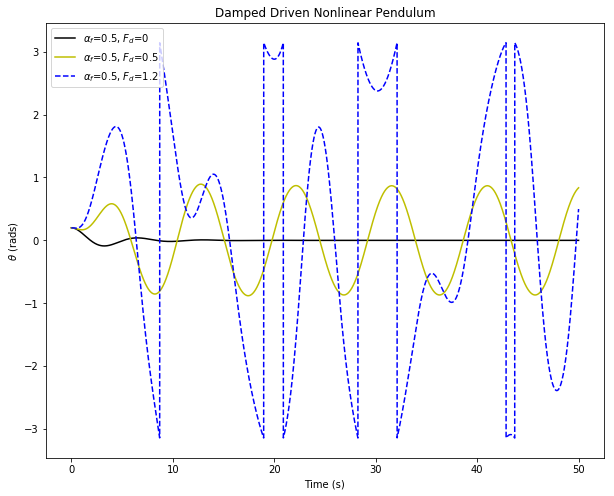

In [15]:
if "__main__" == __name__:

    styles = ["-k", "-y", "--b", "--g"]
    
    #set Runge-Kutta argument values
    a = 0 #s
    b = 50 #s
    interval = (a, b)
    steps = 10000
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/^s
    l = 9.8 #m
    alpha_f = [0.5] #N/kgs
    F_d = [0, 0.5, 1.2] #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)
    
    #set up the graph
    plt.figure(figsize=(10, 8))
    ax = plt.subplot (111)
    ax.set_xlabel ("Time (s)")
    ax.set_ylabel (r"$\theta$ (rads)")
    ax.set_title ("Damped Driven Nonlinear Pendulum")
    
    #initialize style count to zero
    count = 0
    
    #plot each figure
    for i in range (len (alpha_f)):
        for j in range (len (F_d)):
            
            #solve for the oscillator values
            solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, 
                           l, alpha_f[i], F_d[j], omega_d, order = 4)
            
            #ensure solution values are between -pi and pi
            solution = oscillatorDomain (solution)
            
            #plot the current solution
            ax.plot (solution[:,0], solution[:,2], styles[count], label = r"$\alpha_f$={}, "
                     "$F_d$={}".format (alpha_f[i], F_d[j]))
            
            #increment count for the graph style
            count += 1
            
    plt.legend()
    plt.show()

**Figure 1**

*
This figure shows the angle of displacement for a damped driven nonlinear pendulum with a friction coefficient of 0.5 N/kg. The $\theta$-axis shows the angle of displacement, the range is from -4 to 4 radians. The time-axis shows the time elapsed and ranges from 0 to 60 seconds. There are three lines. The lines are solid-black, solid-yellow, and dashed-blue, which correspond with a driving coefficient of 0, 0.5, and 1.2 N/kg. The line for $F_d = 0$ N/kg begins by oscillating, but the magnitude decays rapidly and is essentially zero by 15 seconds. This makes sense considering a pendulum with a frictional force and no driving force should lose energy and stop oscillating over time. The line for $F_d = 0.5$ N/kg oscillates with a fairly constant magnitude of approximately 1 radian. This corresponds with a pendulum that oscillates with the driving force. The line for $F_d = 1.2$ N/kg oscillates sporadically from $-\pi$ to $\pi$. The reason for this is that the driving force for this case is large enough that it easily overcomes the frictional force. This means that it is possible for the pendulum to make full $2\pi$ rotations. Although the graph has points that appear discontinuous the reason there are spikes in the graph is due to a remapping of the angle-value. Since any angle $\theta$ is equivalent to $\theta \pm 2\pi$, we mapped this graph to keep $\theta$ within the range of $-\pi$ to $\pi$, as is customary [2]. 
*



**Introduction continued**

The final case behaves in a much different manner than the first to. The first two driving forces cause a pendulum to have fairly simple motion, one oscillates with a decreasing amplitude and the other oscillates with a constant amplitude (after a short period at the beginning). For the larger driving force the pendulum's motion fails to fall into a pattern or a normal oscillatory motion. *Figure 2* helps to show that this is not a result of the fact I corrected the pendulum's angle to be between $-\pi$ and $\pi$, nor due to the constraint of the time limit. This case is known as chaotic. The reason for this is that this case is both deterministic and unpredictable. By deterministic I mean I can calculate the angle at any given time given the initial parameters. *Figure 3* helps to show what is meant by unpredictable.

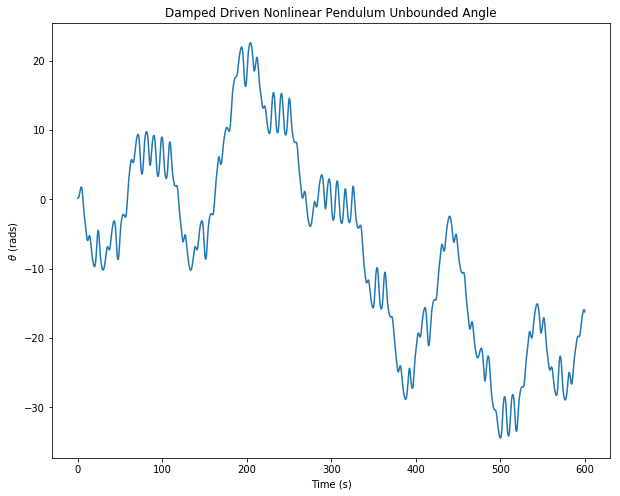

In [23]:
if "__main__" == __name__:
  
    #set Runge-Kutta argument values
    a = 0 #s
    b = 600 #s
    interval = (a, b)
    steps = 10000000
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/^s
    l = 9.8 #m
    alpha_f = 0.5 #N/kgs
    F_d = 1.2 #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)
    
    #set up the graph
    plt.figure(figsize=(10, 8))
    ax = plt.subplot (111)
    ax.set_xlabel ("Time (s)")
    ax.set_ylabel (r"$\theta$ (rads)")
    ax.set_title ("Damped Driven Nonlinear Pendulum Unbounded Angle")
    
    #initialize style count to zero
    count = 0
    
    #solve for the oscillator values
    solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, 
                   l, alpha_f, F_d, omega_d, order = 4)

    #plot the current solution
    ax.plot (solution[:,0], solution[:,2])
            
    plt.show()

**Figure 2**

*
This figure shows the angle from the initial vertical of a pendulum where the angle is not remapped to be between $-\pi$ and $\pi$. The time-axis ranges from 0 to 600 seconds and the $\theta$-axis ranges from -30 to 20 radians. The graphed line is shown in blue and changes rapidly from increasing to decreasing with no continued pattern to the motion. This graph helps to show that even over an extended period of time the motion of the pendulum does not fall into a pattern. The angle of the pendulum was not remapped to be between $-\pi$ and $\pi$ to show that the remapping did not prevent a pattern of the motion from showing up.
*

**Introduction continued**

*Figure 3* shows the difference in the angle ($\Delta\theta$) of two pendulums started with an angle difference of 0.001 radians. In subplot 1 the driving coefficient is 0.5 N/kg, the same value that created the constant oscillating function in *Figure 1*. As shown in the figure, $\Delta\theta$ decreases overtime for this low driving force case. This trend continues as more time elapses and is only cut short by rounding error. As a result of $\Delta\theta$ converging to zero, the two pendulums must be converging to having the same state of motion at the same time. This means that given the starting conditions of one of the pendulums I could predict the position of the other pendulum, which means that this motion is predictable. 

*Figure 3* subplot 2 shows the case for the driving coefficient of 1.2 N/kg. The difference in the angle between the two pendulum increases with time. As seen in the plot, the angle difference increased rapidly for a small amount of time and levels off near $2\pi$ (because this is the maximum $\Delta\theta$ possible). Despite these pendulums being started at similar states their behaviours diverge rapidly. This means that even with a complete solution to one of the pendulum's motion I would be unable to predict the other pendulum's motion. This is what is meant by unpredictable.

The dashed lines in each plot in *figure 3* corresponds to the approximate trend of $\Delta\theta$. This trend is approximately $\log (\Delta\theta) \approx \lambda t$. Solving this for $\Delta\theta$ gives the relation $\Delta\theta \approx e^{\lambda t}$, where $\lambda$ is known as the Lyapunov exponent [2]. As seen in *figure 3* $\lambda$ was negative when $\Delta\theta$ converged while $\lambda$ was positive when $\Delta\theta$ diverged. This is actually a property of the Lyapunov exponent, which means that $-\lambda$ values correspond to nonchaotic systems while $+\lambda$ values correspond to chaotic systems, and the transition occurs at $\lambda$ = 0 [2].


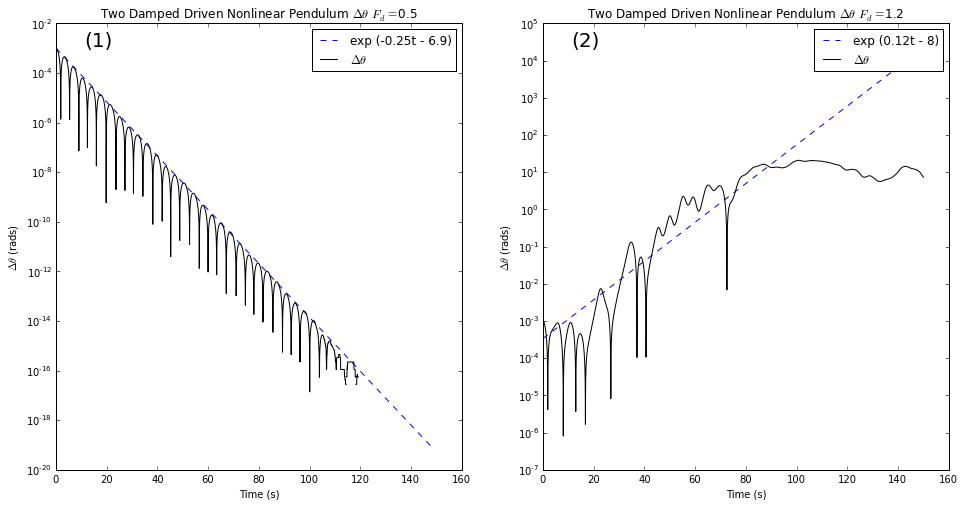

In [27]:
if "__main__" == __name__:
    #establish initial plot values
    plotLabelXPos = 0.075
    plotLabelYPos = 0.95
    plotLabelFontSize = 20

    #set Runge-Kutta argument values
    interval = (0, 150)
    steps = 10000
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/s^2
    l = 9.8 #m
    alpha_f = 0.5 #N/kg
    F_d = [0.5, 1.2] #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)

    #set intial Lyapunov exponent values
    xValues = np.arange (interval[0], interval[1])
    alpha = [-0.25, 0.12]
    beta = [6.9, 8]
    
    plt.figure(figsize=(16, 8))
        
    for i in range (len (F_d)):
        
        #set Lyapunov exponent for pendulum
        yValues = []
        for x in xValues:
            yValues.append (np.exp (alpha[i] * x - beta[i]))

        #solve pendulum values for starting conditions differing by only 0.001 radians
        solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, l, alpha_f, F_d[i], omega_d, order = 4)
        
        #add 0.001 radian starting difference and calculate new data points
        r0 = (r0[0], r0[1] + 0.001)
        solution2 = rk (nonlinearPendulum, numIndepVars, r0, interval, steps, g, l, alpha_f, F_d[i], omega_d, order = 4)

        #create set with the solution's differences
        diff = solution2 - solution

        #set up plot
        ax = plt.subplot(1, 2, i + 1)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel(r"$\Delta\theta$ (rads)")
        ax.set_title (r"Two Damped Driven Nonlinear Pendulum $\Delta\theta$ $F_d=${}".format (F_d[i]))
        ax.text (plotLabelXPos, plotLabelYPos, "(" + str (i + 1) + ")", fontsize=plotLabelFontSize, 
                 transform=ax.transAxes)
        #plot the difference in theta and the Lyapunov exponent solution
        plt.semilogy (xValues, yValues, "--b", label = "exp ({}t - {})".format (alpha[i], beta[i]))
        plt.semilogy(solution[:,0], abs(diff[:,2]), "-k", label = r"$\Delta\theta$")
  
        plt.legend()
    
    plt.show ()

**Figure 3**

*
These plots show the difference in the angular position of two pendulums that start with an initial angular difference of $\theta = 0.001$ radians. Both plots are semilog plots, where the $\Delta\theta$-axis is log base 10. Subplot (1) is for the case of $F_d = 0.5$ N/kg. The $\Delta\theta$-axis ranges from $10^{-20}$ to $10^{-2}$ radians. The time-axis ranges from 0 to 160 seconds. There are two lines, the solid-black line is for the $\Delta\theta$-value while the dashed-blue line is for an exponential decay function. The $\Delta\theta$ line has sharp dips in between small rounded peaks. The overall trend of the peaks is modeled by the exponential function $e^{-0.25t - 6.9}$. The sudden dips correspond to the cases that the pendulums change directions, which means that the difference between the angles will be zero for a single instance. As a result of this it makes sense to focus on the overall trend of the $\Delta\theta$ function, shown with the exponential function. Subplot (2) is for the case $F_d = 1.2$ N/kg. The $\Delta\theta$-axis ranges from $10^{-7}$ to $10^{5}$ radians. The time-axis also ranges from 0 to 160 seconds. The solid-black line shows the $\Delta\theta$-value for the pendulums and the dashed-blue line shows an exponential function. The $\Delta\theta$ line, like the one in subplot (1), has sharp dips, but the overall trend is increasing. The overall trend is approximatly given by $e^{0.12t - 8}$, which is the function for the dashed-blue line.
*

**Introduction continued**

A more complicated system that displays chaotic behaviour is given by the Lorenz equations. The Lorenz equations is a set of differential equations that model a simplified weather system [1,2,3]. The chaotic nature of the equations was discovered in the 1960s by Edward Lorenz when he used intermediate values from one simulation as the starting conditions for another. The difference between the two simulations ended up "as big as the signal itself", according to Lorenz, due to a small rounding in the new starting values [3].

*Figure 4* shows how sensitive chaotic systems can be to small approximations. This figure shows several solutions to the pendulum problem where the step size is varied. For small time values the variation in the angular displacement is not significant enough to notice, but by 200 seconds the angles are completely different. This graph does not constrict the angle to be between $-\pi$ and $\pi$ to emphasis that the path taken by the pendulum in all four cases is completely different overall.

The Lorenz equations originally come from a simplified system of equations that describe the flow of a fluid in a two-dimensional system [3,4]. From this it can be shown that x is related to convective intensity, y is related to a temperature difference between currents that are ascending and decending, and z is related to the difference in the temperature profile from linearity [4]. That being said, the equations model a highly complicated system with only three variables so there is little meaning or real world application for the results of these variable's specific values other than their chaotic behaviour [3].

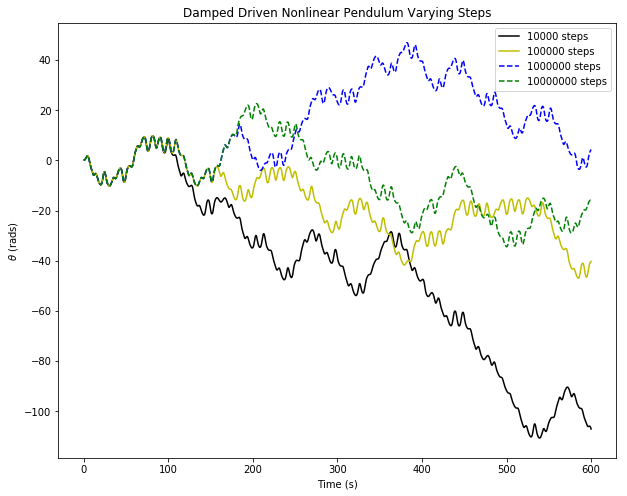

In [27]:
if "__main__" == __name__:

    styles = ["-k", "-y", "--b", "--g"]
    
    #set Runge-Kutta argument values
    a = 0 #s
    b = 600 #s
    interval = (a, b)
    steps = [10000, 100000, 1000000, 10000000]
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8 #m/^s
    l = 9.8 #m
    alpha_f = 0.5 #N/kgs
    F_d = 1.2 #N/kg
    omega_d = 2/3 #rads/sec
    r0 = (0.0, 0.2) #omega (rads/sec), theta (rads)
    
    #set up the graph
    plt.figure(figsize=(10, 8))
    ax = plt.subplot (111)
    ax.set_xlabel ("Time (s)")
    ax.set_ylabel (r"$\theta$ (rads)")
    ax.set_title ("Damped Driven Nonlinear Pendulum Varying Steps")
    
    #initialize style count to zero
    count = 0
    
    #plot each figure
    for i in range (len (steps)):

        #solve for the oscillator values
        solution = rk (nonlinearPendulum, numIndepVars, r0, interval, steps[i], g, 
                       l, alpha_f, F_d, omega_d, order = 4)

        #plot the current solution
        ax.plot (solution[:,0], solution[:,2], styles[count], label = "{} steps".format (steps[i]))

        #increment count for the graph style
        count += 1
            
    plt.legend()
    plt.show()

**Figure 4**

*
This figure shows how drastically different the motion of the pendulum changes based upon small variations caused by differing the step size used for the calculation. The time-axis ranges from 0 to 600 seconds. The $\theta$-axis ranges from -100 radians to 40 radians. There are four lines, one for each of the time steps 10,000, 100,000, 1,000,000, and 10,000,000 steps, which are shown by lines that are solid-black, solid-yellow, dashed-blue, and dashed-green respectivly. All four lines change direction frequently and throughout the entire interval. All four lines overlap until just after 100 seconds. After 100 seconds the 10,000 step line no longer overlaps with the others. The other three all overlap until about 175 seconds, where the 100,000 step line diverges from the other two. The lines for 1,000,000 and 10,000,000 steps overlap until right around 190 seconds at which point they diverge from eachother. After 190 seconds none of the lines share a similiar pattern or very similiar values for long.
*

## Model




**PROBABLY DELETE ALL THIS FROM HERE**
*
To derive the equation of motion we begin by looking at the sum of the forces applied to the pendulum. In the $\theta$ direction we have the driving force ($F_D$) which will be a time dependant force with a frequency of $\Omega_d$. Considering this force is sinusoidal, the sign of this force is based upon the starting conditions. This is due to the sine function's general form being $\sin(\omega t + \psi)$, where $\psi$ is a constant. Positive values of $\psi$ move the function to the left and negative values move the function to the right. Since $\psi$ is a constant it only affects the initial shift in the function and is independant of time, so we can arbitrarily assume this force is positive. The driving force can be written as

\begin{equation*}
F_D \sin (\Omega_d t),
\end{equation*}

where $F_D$ is the magnitude of the force. The frictional force is assumed to be proportional to the pendulum's angular velocity and can thus be written as

\begin{equation*}
\alpha_F \frac{d\theta}{dt},
\end{equation*}

where $\alpha_F$ is a coefficient that affects the magnitude of the force. Since the frictional force will always be in the opposite direction of the motion, this force component will be subtracted from the overall forces. In the vertical direction the only force is that due to gravity. This restoring force is dependant upon the angle of displacement from the vertical axis and is given by

\begin{equation*}
m\frac{g}{l}\sin(\theta).
\end{equation*}

As in the case of the frictional force, the gravitational force will be opposite that of the pendulum's motion, and as such the force will be subtracted from the sum of the forces. That being said, summing all of forces results in the equation of motion

\begin{equation*}
F_\theta = -m\frac{g}{l}\sin(\theta) - \alpha_F \frac{d\theta}{dt} + F_D \sin (\Omega_d t).
\end{equation*}

Rewriting this using Newton's second law we get

\begin{equation*}
ma = m \frac{d^2\theta}{dt^2} = -m\frac{g}{l}\sin(\theta) - \alpha_F \frac{d\theta}{dt} + F_D \sin (\Omega_d t).
\end{equation*}

Dividing through by $m$ and absorbing $1/m$ into $\alpha_F$ and $F_D$ we can rewrite this equation in its final form

\begin{equation*}
\frac{d^2\theta}{dt^2} = -\frac{g}{l}\sin(\theta) - \alpha_f \frac{d\theta}{dt} + F_d \sin (\Omega_d t),
\end{equation*}

where $\alpha_f = \alpha_F/m$ and $F_d = F_D/m$. Note that the units for $\alpha_f$ is Newtons per kilogram-seconds and $F_d$ is Newtons per kilogram, these are not force values.
MENTION GRAPH BELOW THAT SHOWS A FEW OF THE BASE CASES OF HOW THIS LOOKS BY DEFAULT.
*
**TO HERE**


\begin{equation*}

\end{equation*}










#### Lorenz Equations
\begin{equation*}
\frac{dx}{dt} = \sigma (y - x) \\ 
\frac{dy}{dt} = x (\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{equation*}

#### Dampened Driven Nonlinear Pendulum
\begin{equation*}
\frac{d^2\theta}{dt^2} = -\frac{g}{l} \sin (\theta) - \alpha_f \frac{d\theta}{dt} + F_d \sin (\Omega_d t)
\end{equation*}






## Numerical Method

#### Runge-Kutta Method



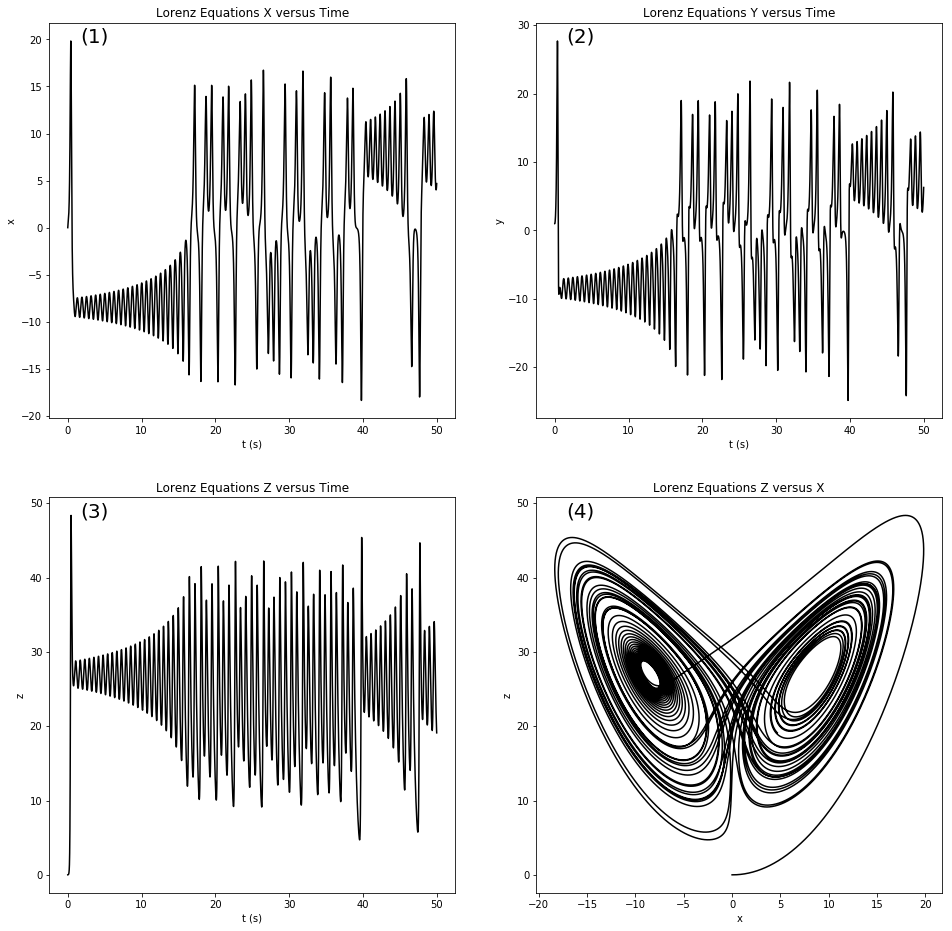

In [30]:
if __name__ == "__main__":
    #establish initial plot values
    plotLabelXPos = 0.075
    plotLabelYPos = 0.95
    plotLabelFontSize = 20
    
    #set constants and starting condition
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    r0 = (0, 1, 0)
    
    #set solution interval and accuracy
    interval = (0, 50)
    steps = 1000000
    
    #solve Lorenz equations
    solution = lorenzSolution (r0, interval, steps, state)
    
    #set up plot
    plt.figure(figsize=(16, 16))
    
    # x vs time
    ax = plt.subplot(221)
    ax.set_xlabel("t (s)")
    ax.set_ylabel("x")
    ax.set_title ("Lorenz Equations X versus Time")
    ax.text (plotLabelXPos, plotLabelYPos, "(1)", fontsize=plotLabelFontSize, 
             transform=ax.transAxes)
    plt.plot(solution[:,0], solution[:,1], "-k")
    
    # y vs time
    ax = plt.subplot(222)
    ax.set_xlabel("t (s)")
    ax.set_ylabel("y")
    ax.set_title ("Lorenz Equations Y versus Time")
    ax.text (plotLabelXPos, plotLabelYPos, "(2)", fontsize=plotLabelFontSize, 
             transform=ax.transAxes)
    plt.plot(solution[:,0], solution[:,2], "-k")
    
    # z vs time
    ax = plt.subplot(223)
    ax.set_xlabel("t (s)")
    ax.set_ylabel("z")
    ax.set_title ("Lorenz Equations Z versus Time")
    ax.text (plotLabelXPos, plotLabelYPos, "(3)", fontsize=plotLabelFontSize, 
             transform=ax.transAxes)
    plt.plot(solution[:,0], solution[:,3], "-k")
    
    # x vs z
    ax = plt.subplot(224)
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title ("Lorenz Equations Z versus X")
    ax.text (plotLabelXPos, plotLabelYPos, "(4)", fontsize=plotLabelFontSize, 
             transform=ax.transAxes)
    plt.plot(solution[:,1], solution[:,3], "-k")
    
    plt.show ()

    

**Figure 3**

*
This figure shows the solution to the Lorenz equations for the values $\sigma$ = 10, $\rho$ = 28, and $\beta$ = 8/3.
*

    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)

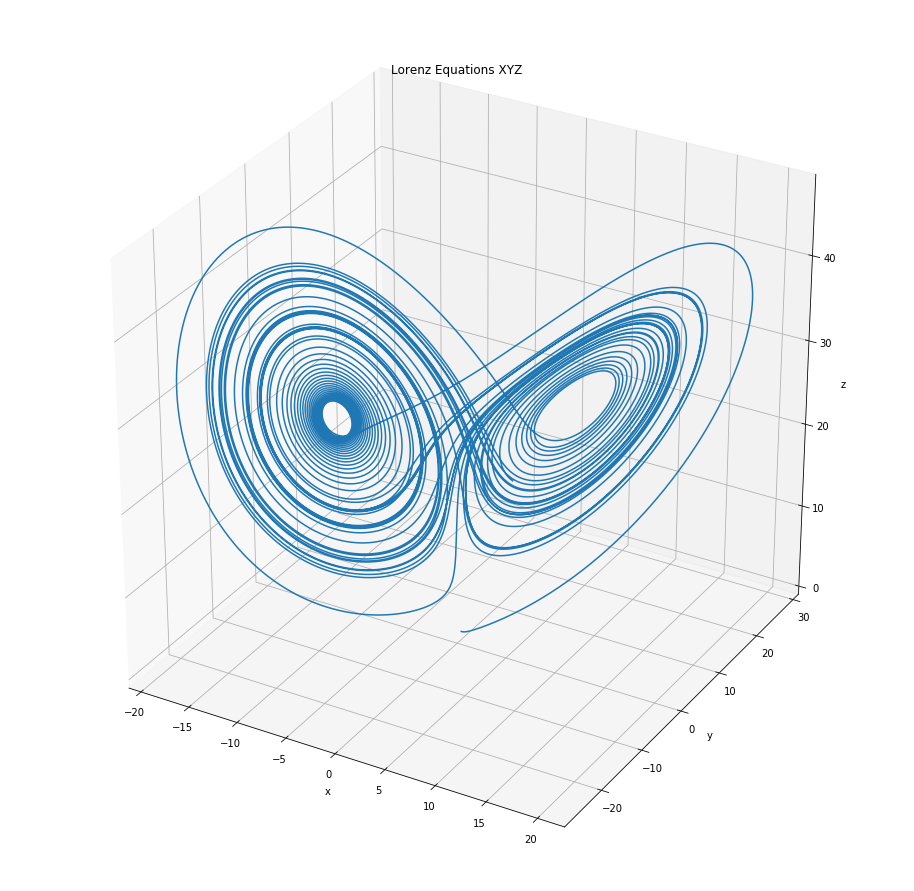

In [44]:

if __name__ == "__main__":
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    r0 = (0, 1, 0)
    
    interval = (0, 50)
    steps = 100000
    
    solution = lorenzSolution (r0, interval, steps, state)

    fig =  plt.figure(figsize=(16, 16))
    ax = fig.gca(projection='3d')
    ax.set_xlabel ("x")
    ax.set_ylabel ("y")
    ax.set_zlabel ("z")
    ax.set_title ("Lorenz Equations XYZ")
    ax.plot(solution[:,1], solution[:,2], solution[:,3])
    plt.show()

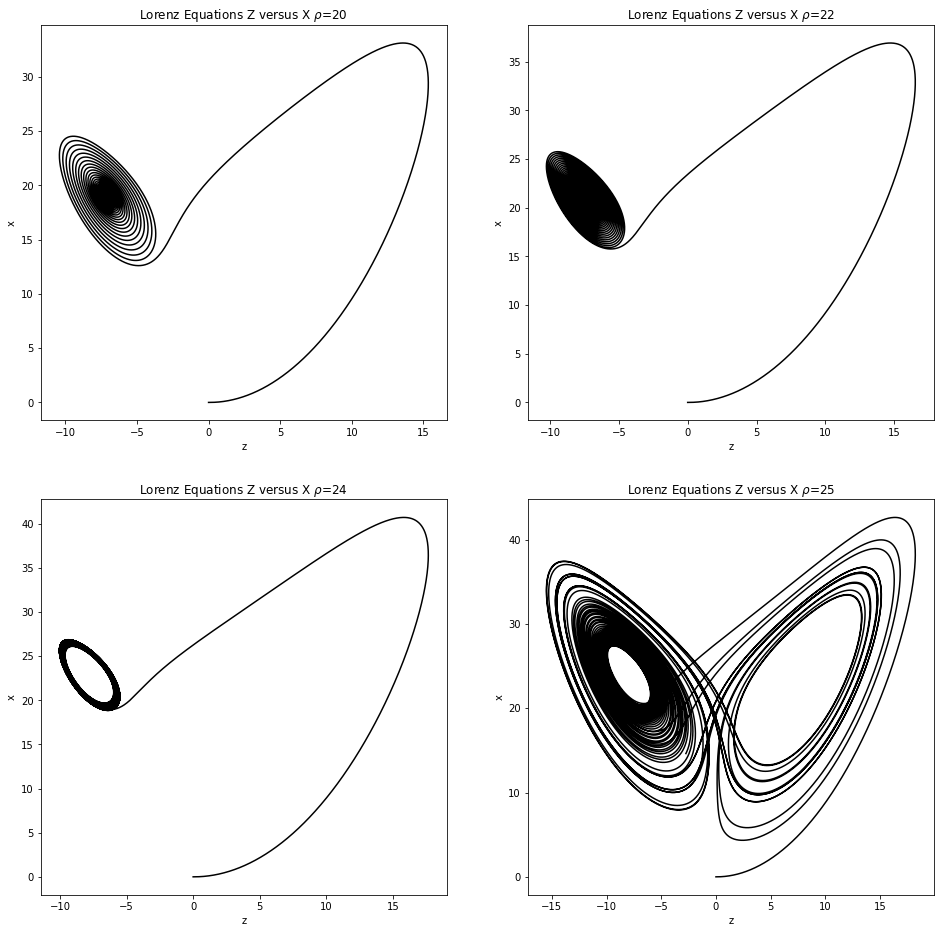

In [20]:
if __name__ == "__main__":
    sigma = 10.0
    rho = [20, 22, 24, 25]
    beta = 8.0 / 3.0
    r0 = (0, 1, 0)
    
    interval = (0, 50)
    steps = 100000
    
    #set up plot
    plt.figure(figsize=(16, 16))
    
    for i in range (len (rho)):
        state = (sigma, rho[i], beta)

        solution = lorenzSolution (r0, interval, steps, state)

        # x vs z
        ax = plt.subplot(2, 2, i + 1)
        ax.set_xlabel("z")
        ax.set_ylabel("x")
        ax.set_title (r"Lorenz Equations Z versus X $\rho$={}".format (rho[i]))
        plt.plot(solution[:,1], solution[:,3], "-k")

    
    plt.show ()


**References:**

[1] Newman  
[2] Giordano  
[3] Muthuramalingam, Rasi. (2013). ANALYTICAL SOLUTION OF LORENZ EQUATION USING HOMOTOPY ANALYSIS METHOD. 
Journal of Global Research in Mathematical Archives. 1. 14. 
https://www.researchgate.net/publication/273641652_ANALYTICAL_SOLUTION_OF_LORENZ_EQUATION_USING_HOMOTOPY_ANALYSIS_METHOD  
[4] Weisstein, Eric W. "Lorenz Attractor." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/LorenzAttractor.html